In [1]:
%matplotlib inline
from pylab import *

# Construction du manche

On code les notes de la manière suivante : un chiffre entre 0 (C) et 11 (B).

In [2]:
def note2int(note):
    """ returns int associated with a given note"""
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    ints = range(12)
    return dict(zip(notes, ints))[note]

In [3]:
note2int('D')

2

In [4]:
def int2note(integer):
    """ returns note associated to a given int"""
    notes = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
    ints = range(12)
    return dict(zip(ints, notes))[integer]

In [5]:
int2note(4)

'E'

On peut construire les cordes de la guitare en empilant des lignes qui correspondent à chaque corde, alors que les colonnes de la matrice correspondent aux cases.

In [6]:
guitar = vstack((((arange(12) + 4) % 12), # mi aigu
                 ((arange(12) + 11) % 12),
                 ((arange(12) + 7) % 12),
                 ((arange(12) + 2) % 12),
                 ((arange(12) + 9) % 12),
                 ((arange(12) + 4) % 12)))

In [7]:
[int2note(guitar[i, 0]) for i in range(6)]

['E', 'B', 'G', 'D', 'A', 'E']

Par comparaison booléenne, on peut n'afficher que certains notes.

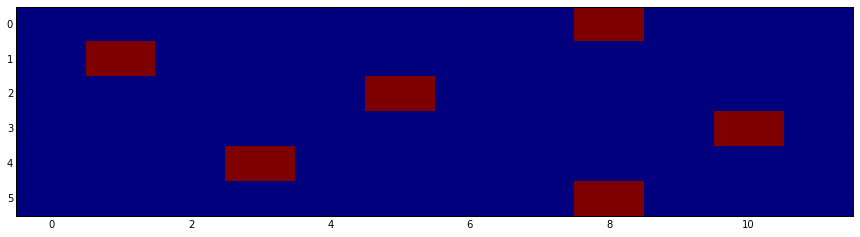

In [8]:
figure(figsize=(15, 6))
imshow(guitar == note2int('C'), interpolation = 'nearest', aspect=.5)

On peut étendre ce principe à plusieurs notes.

In [9]:
def guitar_with_notes(notes):
    guitar_with_notes = zeros(guitar.shape, dtype=bool8)
    for note in notes:
        guitar_with_notes += (guitar == note2int(note))
    return guitar_with_notes

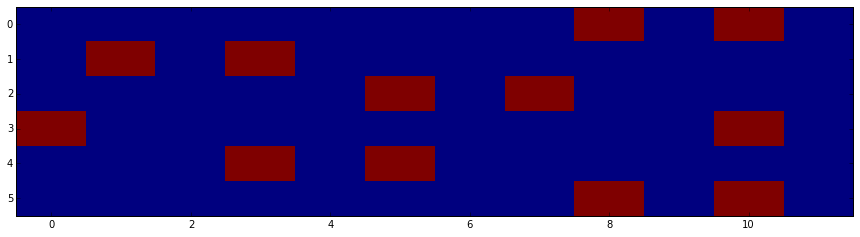

In [10]:
figure(figsize=(15, 6))
imshow(guitar_with_notes(['C', 'D']), interpolation = 'nearest', aspect=.5)

Finalement, on peut afficher un accord de A mineur 7 b5, les notes étant : [A, C, Eb==D#, G]

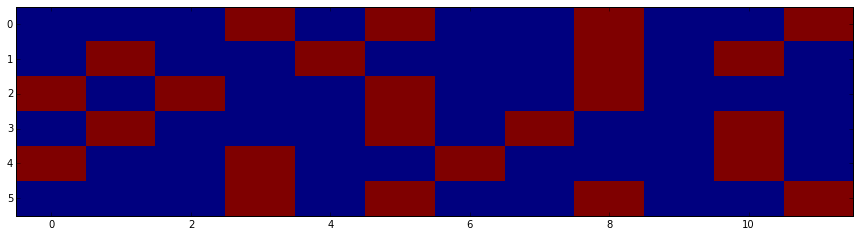

In [11]:
figure(figsize=(15, 6))
imshow(guitar_with_notes(['A', 'C', 'D#', 'G']), interpolation = 'nearest', aspect=.5)

Voir même avec des couleurs.

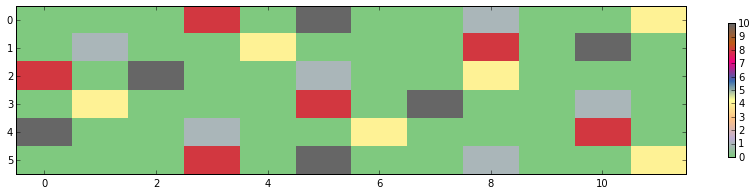

In [12]:
figure(figsize=(15, 6))
imshow(guitar_with_notes(['A', 'C', 'D#', 'G']) * (guitar + 1), interpolation = 'nearest', aspect=.5, cmap=cm.Accent)
cbar = colorbar(shrink=0.4)

Enfin, nous pouvons également expérimenter avec le dessin des cordes individuelles.

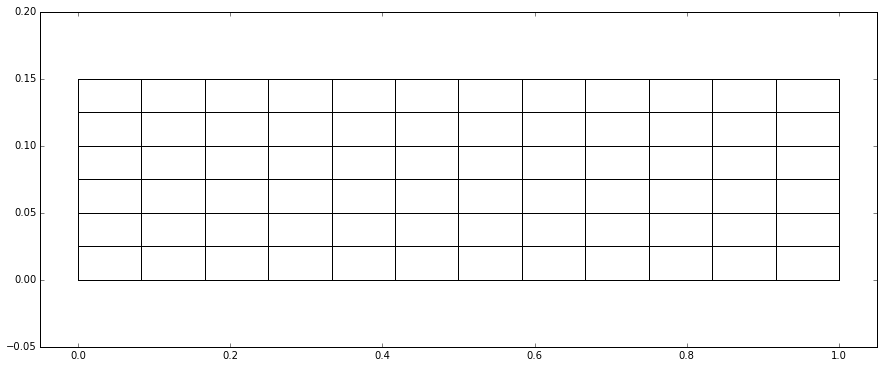

In [13]:
figure(figsize=(15, 6))
def plot_neck():
    scale = 0.15
    delta = 0.05
    # lignes horizontales
    for i in range(7):
        plot([0, 1], array([i, i]) / 6. * scale, 'black')
    # lignes verticales
    for i in range(13):
        plot(array([1, 1]) * i/12., [scale, 0], 'black')
    
    xlim(-delta, 1 + delta)
    ylim(-delta, scale + delta)

plot_neck()

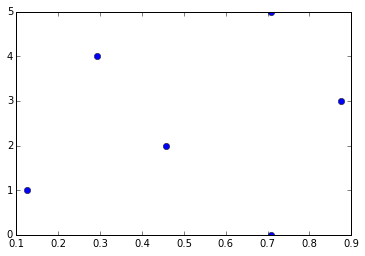

In [14]:
def plot_notes(notes):
    guitar_neck = guitar_with_notes(notes)
    for i in range(6):
        for j in range(12):
            if guitar_neck[i, j] == True:
                plot([(j + 0.5) / 12.], [i], 'bo')

plot_notes(['C'])

## Putting it all together

In [15]:
class guitar_plotter(object):
    def __init__(self, scale=0.3, delta=0.1):
        self.scale = scale
        self.delta = delta
    
    def plot_neck(self):
        for i in range(6):
            plot([0, 1], array([i, i]) / 5. * self.scale, 'black')

        for i in range(13):
            
            line = plot(array([1, 1]) * i/12., [self.scale, 0], 'black')
            if i == 0 or i == 12:
                setp(line, linewidth=4.0)
            
        xlim(-self.delta, 1 + self.delta)
        ylim(-self.delta, self.scale + self.delta)
        
    def plot_notes(self, notes, labels=[]):
        guitar_neck = guitar_with_notes(notes)
        for i in range(6):
            for j in range(12):
                if guitar_neck[i, j] == True:
                    plot([(j - 0.5) / 12.], [(5 - i) / 5. * self.scale], 'bo')
                    if labels != []:
                        text = dict(zip(notes, labels))[int2note(guitar[i, j])]
                    else:
                        text = int2note(guitar[i, j])
                    annotate(text, ((j - 0.5) / 12., (5 - i + 0.15) / 5. * self.scale))

    def plot_neck_and_notes(self, notes, labels=[]):
        self.plot_neck()
        self.plot_notes(notes, labels)
        gca().set_axis_off()

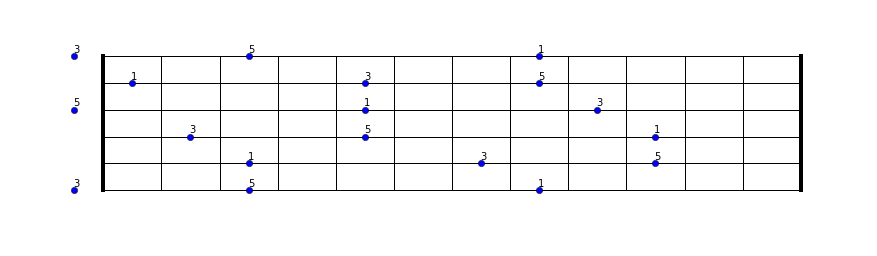

In [16]:
figure(figsize=(15, 4))
gp = guitar_plotter()
gp.plot_neck_and_notes(['C', 'E', 'G'], ['1', '3', '5'])


# Application aux accords de la gamme majeure

## Majeur 7

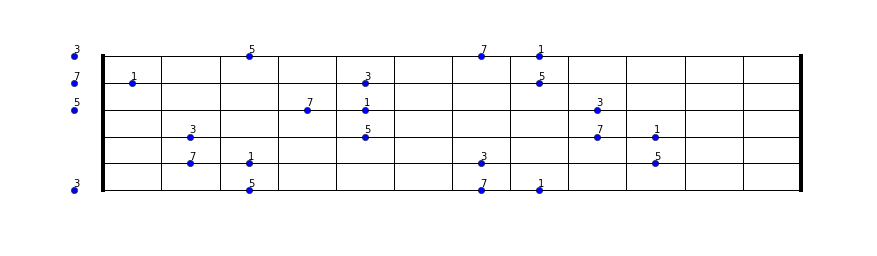

In [17]:
figure(figsize=(15, 4))
gp = guitar_plotter()
gp.plot_neck_and_notes(['C', 'E', 'G', 'B'], ['1', '3', '5', '7'])

## Mineur 7

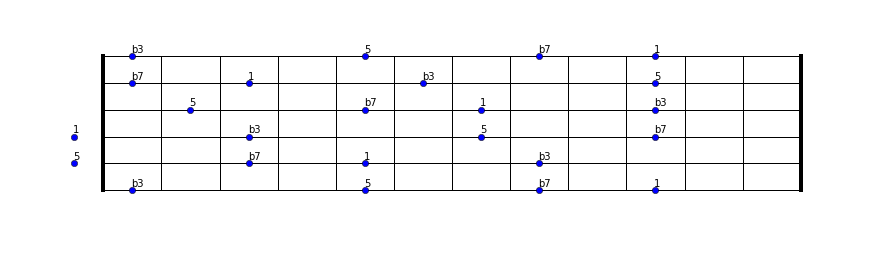

In [18]:
figure(figsize=(15, 4))
gp = guitar_plotter()
gp.plot_neck_and_notes(['D', 'F', 'A', 'C'], ['1', 'b3', '5', 'b7'])

# Accord de dominante

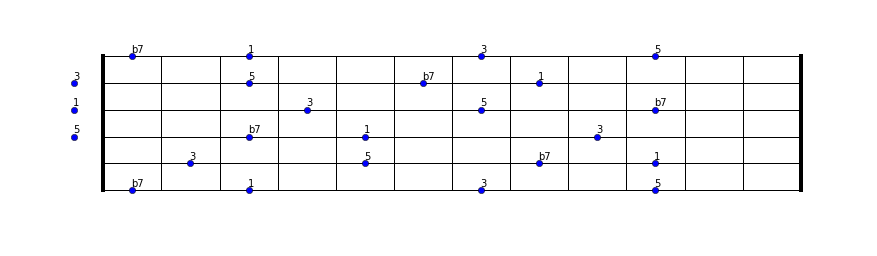

In [19]:
figure(figsize=(15, 4))
gp = guitar_plotter()
gp.plot_neck_and_notes(['G', 'B', 'D', 'F'], ['1', '3', '5', 'b7'])

## Accord mineur 7 quinte bémol

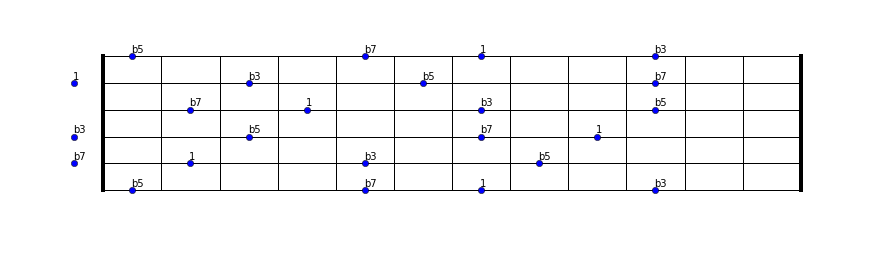

In [20]:
figure(figsize=(15, 4))
gp = guitar_plotter()
gp.plot_neck_and_notes(['B', 'D', 'F', 'A'], ['1', 'b3', 'b5', 'b7'])

# Accord mineur -> accord sus 2 (1789)

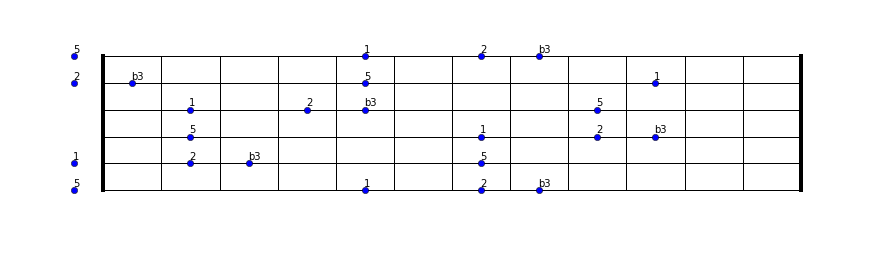

In [21]:
figure(figsize=(15, 4))
gp = guitar_plotter()
gp.plot_neck_and_notes(['A', 'B', 'C', 'E'], ['1', '2', 'b3', '5'])

Au vu du diagramme ci-dessus, il me semble que la meilleure position pour jouer l'accord mineur vers suspendu soit celle avec la tonique sur la corde de La, en barré.

# Diagramme interactif

In [22]:
from IPython.html.widgets import interact

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [23]:
def show_notes(notes):
    notes = notes.split(',')
    gp = guitar_plotter()
    gp.plot_neck_and_notes(notes, notes)

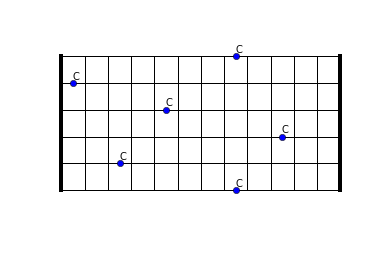

In [24]:
interact(show_notes,
         notes="")

In [ ]:
"A,".split(',')